In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/johnr/Downloads/Adidas US Sales Datasets.xlsx")

In [3]:
data.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0               0.5     In-store  
1          150000.0               0.3     In-store

In [4]:
import datetime
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

# Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  9.648000e+03     9648.000000  9648.000000    9648.000000   
mean   1.173850e+06       45.216625   256.930037   93273.437500   
std    2.636038e+04       14.705397   214.252030  141916.016727   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4254.500000   
50%    1.185732e+06       45.000000   176.000000    9576.000000   
75%    1.185732e+06       55.000000   350.000000  150000.000000   
max    1.197831e+06      110.000000  1275.000000  825000.000000   

       Operating Profit  Operating Margin         Year  
count       9648.000000       9648.000000  9648.000000  
mean       34425.244761          0.422991  2020.865050  
std        54193.113713          0.097197     0.341688  
min            0.000000          0.100000  2020.000000  
25%         1921.752500          0.350000  2021.000000  
50%         4371.420000          0.410000  2021.000000  
75%        52062.500000          0.490000  2021.000000  
max       390000.000000          0.800000  2021.000000

# Uni Variate Analysis

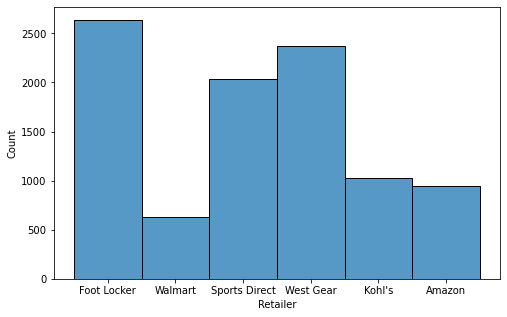

In [7]:
plt.figure(figsize = (8,5))
sns.histplot(data['Retailer'])
plt.show()

-Footlocker is the highest trending followed by West Gear

<AxesSubplot:xlabel='Region', ylabel='Count'>

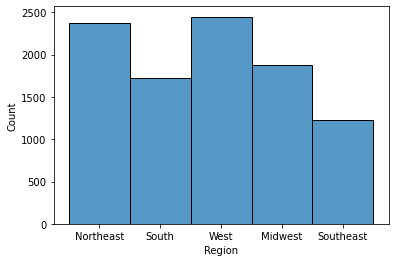

In [8]:
sns.histplot(data['Region'])

<AxesSubplot:xlabel='Total Sales', ylabel='Count'>

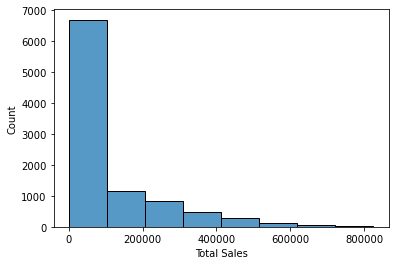

In [9]:
sns.histplot(data['Total Sales'], bins = 8)

The Total Sales is right skewed

<AxesSubplot:xlabel='Operating Profit', ylabel='Count'>

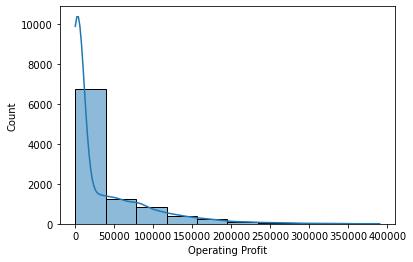

In [10]:
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

As total sales is dependant on profit, Operational Profit is also right skewed

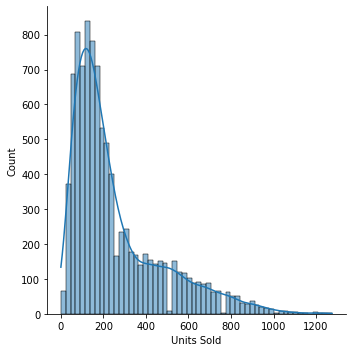

In [11]:
sns.displot(data['Units Sold'], kde = True)
plt.show()

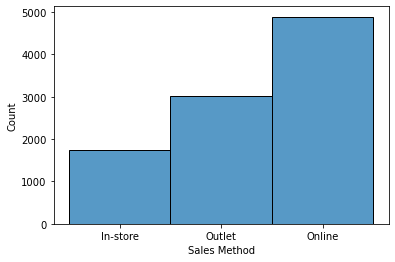

In [12]:
sns.histplot(data['Sales Method'])
plt.show()

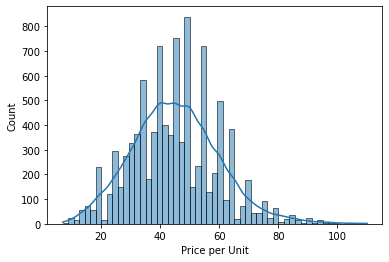

In [13]:
sns.histplot(data['Price per Unit'], kde = True)
plt.show()

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit, Operating Margin and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed
4. Online sales are the highest
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

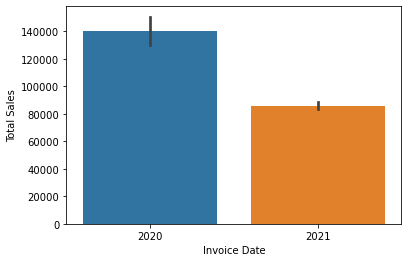

In [14]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales')
plt.show()

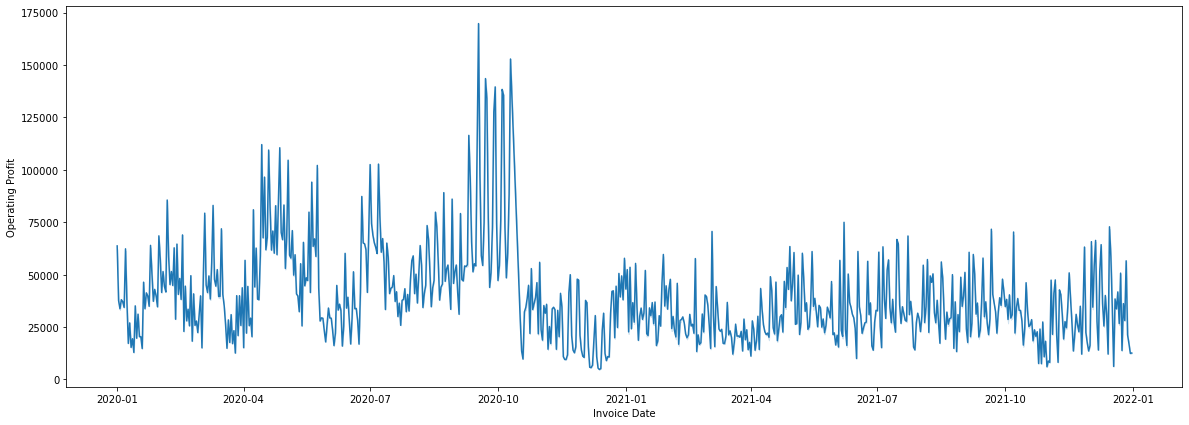

In [15]:
plt.figure(figsize=(20,7))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False)
plt.show()

- The profit spiked from 8/20 to 10/20
- There was an immediate dip in Operating profit
- The profits stayed consistent post the dip maximizing just above 50,000

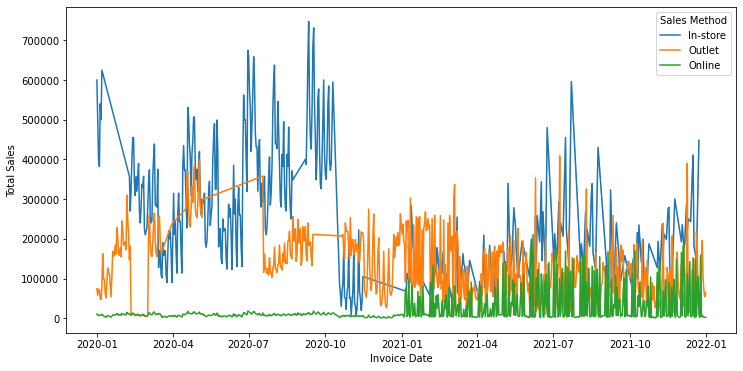

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method')
plt.show()

- The decrease in Total Sales is heavily dependent on the dip observed by the 'In-store' Sales method 
- Outlet sales have rather been fluctuating in the similar range throughout
- Online sales have picked up from 2021

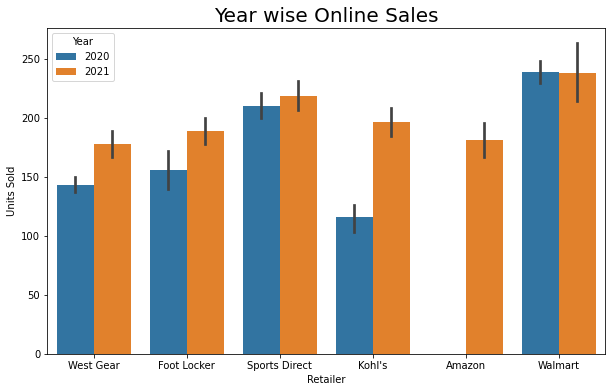

In [17]:
##PLOTTING ONLINE DATA 
OnlineData = pd.DataFrame(data[['Retailer','Sales Method', 'Units Sold', 'Year']][data['Sales Method'] == 'Online'])
plt.figure(figsize = (10,6))
sns.barplot(data = OnlineData, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Year wise Online Sales', fontdict={'size': 20})
plt.show()

## Reasons for subsequent surge in online sales
- Sales via 'Amazon' was started in the year 2021
- Kohl's sales of Adidas products increased significantly
- Footlocker and WestGear have seen an increase in sales online vs 2020

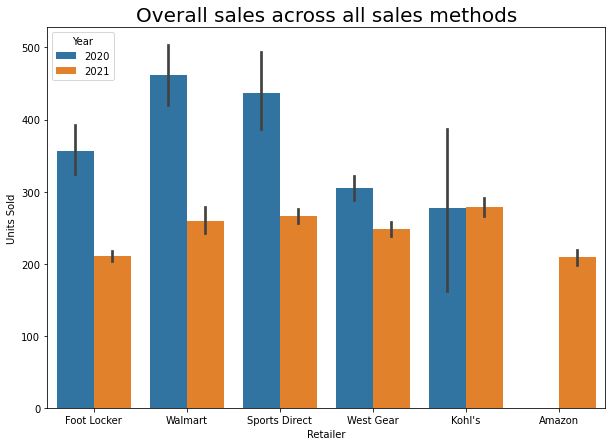

In [18]:
plt.figure(figsize = (10,7))
sns.barplot(data = data, x = 'Retailer', y = 'Units Sold', hue = 'Year').set_title('Overall sales across all sales methods',fontdict={'size': 20})
plt.show()

- Footlocker, Walmart and Sports Direct have dropped their sales significantly in 2021 when compared to 2020
- Kohl's overall sales remained similar comparatively

**THIS IMPLIES THAT THE DIP IN SALES IS DUE TO IN-STORE SALES**

## Why did the sales drop in stores? 

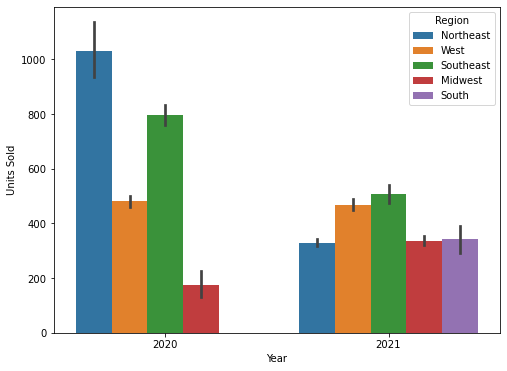

In [19]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region')
plt.show()

- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- However, the sales in 2021 throughout has reduced

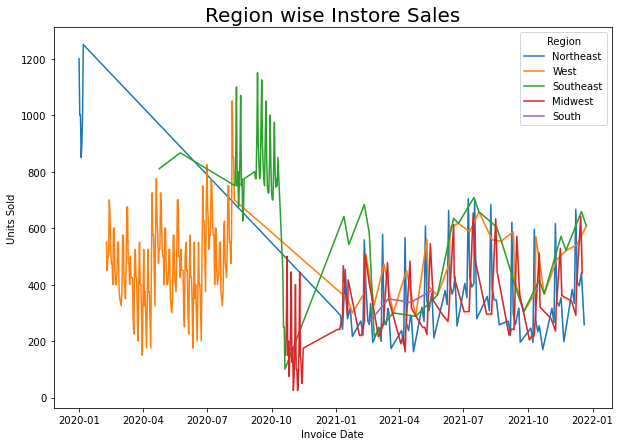

In [20]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[data['Sales Method'] == 'In-store'], x = 'Invoice Date', y = 'Units Sold', hue = 'Region', ci = False).set_title('Region wise Instore Sales', fontdict={'size': 20})
plt.show()

1. Northeast and Southeast regions experienced a massive dip in terms of Units sold
2. There was an increase in West region which collapsed later on as well

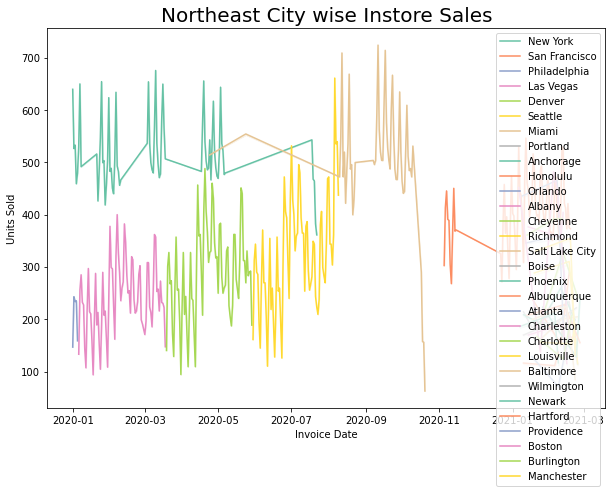

In [21]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Units Sold',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

### The following cities which record the highest units sold stopped contributing to the overall sales in Q4 2020:
1. Miami from the Southeast region (Between April 2020 to December 2020)
2. New York from the Northeast region (Between January 2020 to September 2020) 
3. Las Vegas, Seattle and Denver from the West region (Quarterly until August 2020)


- It was also observed that from 01/2021, various cities have STARTED recording sales in these regions. This can imply:
    - These three stints (in 2020) were a part of test run for expanding their sales' geofence in 2021
    - The end of these test runs caused the dip in the Total Sales

# CORRELATION

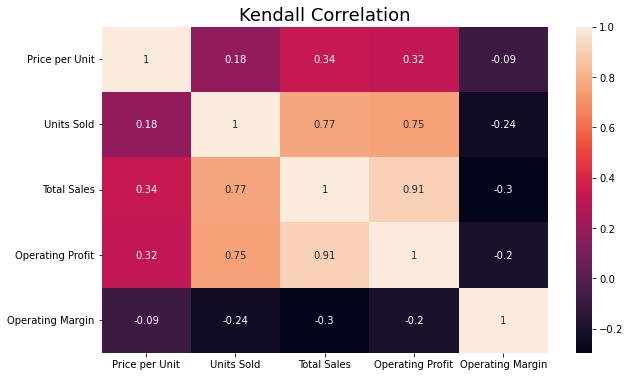

In [22]:
correlationData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
correlation = correlationData.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

#print('Features\'s correlation with Target Feature')
#for indx, cor in enumerate(correlation['Total Sales']):
 #   print(correlation.index[indx], cor)

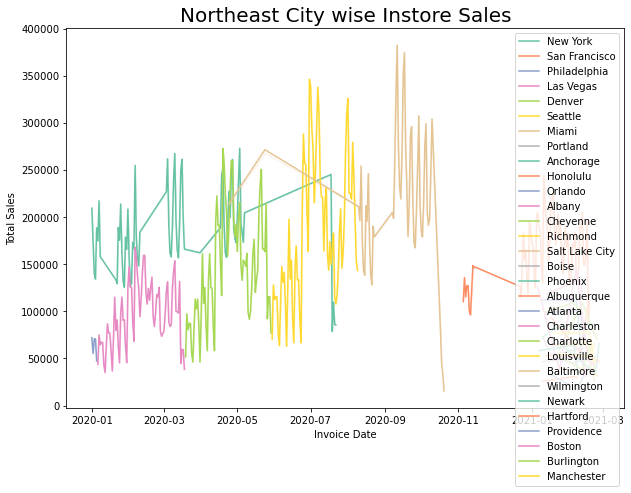

In [23]:
plt.figure(figsize = (10,7))
sns.lineplot(data = data[((data['Region'] == 'Southeast') | (data['Region'] == 'Northeast') | (data['Region'] == 'West')) & (data['Invoice Date'] < '2021-03-01')],
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2').set_title('Northeast City wise Instore Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

# Clustering 

### K means Clustering

In [24]:
# Omitting string columns
clusterData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

#### MIN-MAX SCALING

In [25]:
# Omitting string columns
clusterData1 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData1.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [26]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
minMaxData = pd.DataFrame(minMax.fit_transform(clusterData1),columns = minMax.feature_names_in_)
minMaxData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.417476    0.941176     0.727273          0.769231          0.571429
1        0.417476    0.784314     0.606061          0.384615          0.285714

In [27]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(minMaxData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [28]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 5)
kMeansClustering.fit(minMaxData)
#clusterData1['Clusters'] = kMeansClustering.predict(minMaxData)
clusterPred = pd.DataFrame(kMeansClustering.predict(minMaxData))
minMaxClusters = pd.concat([clusterData1.loc[:],clusterPred], axis = 1)
minMaxClusters.rename(columns = {0:'Clusters'}, inplace = True)
minMaxClusters

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0               50.0        1200     600000.0         300000.00   
1               50.0        1000     500000.0         150000.00   
2               40.0        1000     400000.0         140000.00   
3               45.0         850     382500.0         133875.00   
4               60.0         900     540000.0         162000.00   
...              ...         ...          ...               ...   
9643            50.0          64       3200.0            896.00   
9644            41.0         105       4305.0           1377.60   
9645            41.0         184       7544.0           2791.28   
9646            42.0          70       2940.0           1234.80   
9647            29.0          83       2407.0            649.89   

      Operating Margin  Clusters  
0                 0.50         4  
1                 0.30         4  
2                 0.35         4  
3                 0.35         4  
4                 0.30         4  
...                ...       ...  
9643              0.28         2  
9644              0.32         2  
9645              0.37         2  
9646              0.42         3  
9647              0.27         2  

[9648 rows x 6 columns]

In [29]:
import plotly.express as px
polar=minMaxClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [30]:
mmClustersScaled = pd.concat([minMaxData.loc[:],clusterPred], axis = 1)
mmClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=mmClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

## Observations: 


#### Cluster 0:
- Price per unit and Operating Margin are moderate but the Operating profit, Total Sales and units sold range very low
#### Cluster 1: 
- All attributes perform pretty well and it looks like the ideal cluster
#### Cluster 2: 
- Operating Margin trends high but the Total Sales and the Operating Profit almost don't exist
#### Cluster 3:
- Average Operating Profit is less than that of margin but all aspects trend uniformly
#### Cluster 4:
- Highest Operating Margin, Second highest Price per unit but sales, profit and Units sold almost range at 0






In [31]:
polar

Clusters          variable     value
0          0    Price per Unit  0.429703
1          1    Price per Unit  0.406391
2          2    Price per Unit  0.407681
3          3    Price per Unit  0.220621
4          4    Price per Unit  0.537688
5          0        Units Sold  0.108986
6          1        Units Sold  0.372381
7          2        Units Sold  0.135878
8          3        Units Sold  0.108653
9          4        Units Sold  0.591539
10         0       Total Sales  0.011229
11         1       Total Sales  0.272405
12         2       Total Sales  0.055575
13         3       Total Sales  0.013565
14         4       Total Sales  0.558323
15         0  Operating Profit  0.012594
16         1  Operating Profit  0.205670
17         2  Operating Profit  0.039300
18         3  Operating Profit  0.011741
19         4  Operating Profit  0.448206
20         0  Operating Margin  0.611298
21         1  Operating Margin  0.374056
22         2  Operating Margin  0.353106
23         3  Operating Margin  0.493788
24         4  Operating Margin  0.405418

#### STANDARD SCALING

In [32]:
clusterData2 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [33]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaledData = pd.DataFrame(standardScaler.fit_transform(clusterData2), columns = standardScaler.feature_names_in_)
standardScaledData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.325297    4.401913     3.570794          4.900780          0.792333
1        0.325297    3.468385     2.866115          2.132757         -1.265442

In [34]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [35]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 5)
kMeansClustering.fit(standardScaledData)
#clusterData2['Clusters'] = kMeansClustering.predict(standardScaledData)
ssClusterPreds = pd.DataFrame(kMeansClustering.predict(standardScaledData))
ssClusters = pd.concat([clusterData2.loc[:],ssClusterPreds], axis = 1)
ssClusters.rename(columns = {0:'Clusters'}, inplace = True)
ssClusters.head(2)
#standardScaledData['Clusters'] = kMeansClustering.predict(standardScaledData)
#clusterData2

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin  Clusters  
0               0.5         4  
1               0.3         4

In [36]:
polar=ssClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [37]:
ssClustersScaled = pd.concat([standardScaledData.loc[:],ssClusterPreds], axis = 1)
ssClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=ssClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

## Observations

#### Cluster 0:
- The least Operating margin, Price per unit is moderate whereas the Operating Profit, Sales and Units Sold are low
#### Cluster 1:
- Highest Operating Margin, second highest price per unit but low profit, Units sold and Total Sales
#### Cluster 2: 
- Low Operating Margin but the other features are moderate
#### Cluster 3: 
- High Operating Margin but lowest Price per unit. Profit and sales are relatively low as well
#### Cluster 4:
- Low Operating Margin but the other attributes/features work particularly well making this as the ideal cluster

In [38]:
polar

Clusters          variable     value
0          0    Price per Unit  0.388890
1          1    Price per Unit  0.262258
2          2    Price per Unit -1.060922
3          3    Price per Unit  0.276143
4          4    Price per Unit  1.184029
5          0        Units Sold -0.546657
6          1        Units Sold  1.030420
7          2        Units Sold -0.532574
8          3        Units Sold -0.410755
9          4        Units Sold  2.314833
10         0       Total Sales -0.590519
11         1       Total Sales  0.944388
12         2       Total Sales -0.567311
13         3       Total Sales -0.347617
14         4       Total Sales  2.595199
15         0  Operating Profit -0.542342
16         1  Operating Profit  0.849094
17         2  Operating Profit -0.539575
18         3  Operating Profit -0.366100
19         4  Operating Profit  2.629601
20         0  Operating Margin  1.101224
21         1  Operating Margin -0.650710
22         2  Operating Margin  0.216803
23         3  Operating Margin -0.770171
24         4  Operating Margin -0.353097

## CLUSTERING WITH ONLY TWO FEATURES

In [39]:
clusterDataColumns = data[['Price per Unit', 'Operating Margin']]
clusterDataColumns.head(2)

Price per Unit  Operating Margin
0            50.0               0.5
1            50.0               0.3

In [40]:
from sklearn.preprocessing import StandardScaler
standardScalerColumn = StandardScaler()
standardScaledColumn = pd.DataFrame(standardScaler.fit_transform(clusterDataColumns), columns = standardScaler.feature_names_in_)
standardScaledColumn.head(2)

Price per Unit  Operating Margin
0        0.325297          0.792333
1        0.325297         -1.265442

In [41]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledColumn)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [42]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 5)
kMeansClustering.fit(standardScaledColumn)
standardScaledColumn['Clusters'] = kMeansClustering.predict(standardScaledColumn)

<AxesSubplot:xlabel='Operating Margin', ylabel='Price per Unit'>

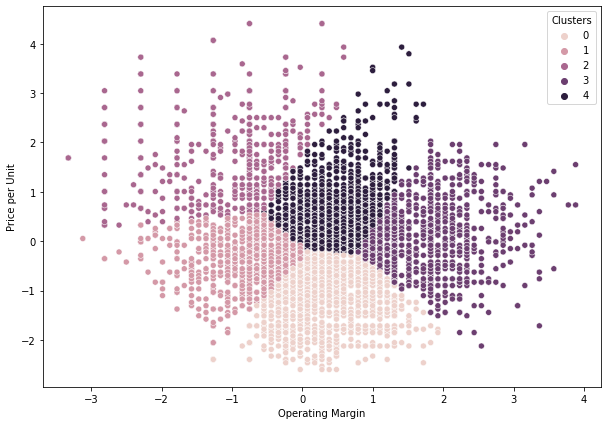

In [43]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = standardScaledColumn, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

In [44]:
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

# Cluster Analysis 

In [45]:
clusterAnalysisData = pd.concat([data.loc[:,['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product']],ssClusters], axis = 1)
clusterAnalysisData.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin  Clusters  
0          300000.0               0.5         4  
1          150000.0               0.3         4

<AxesSubplot:xlabel='Retailer', ylabel='Total Sales'>

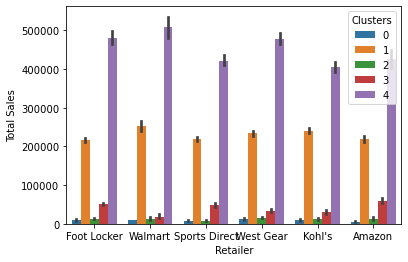

In [46]:
sns.barplot(data = clusterAnalysisData, x = "Retailer", y = "Total Sales", hue = "Clusters" )

In [47]:
clusterAnalysisData['Clusters'].value_counts()

2    2673
0    2281
3    2168
1    1780
4     746
Name: Clusters, dtype: int64

# Clustering + Catrgotical Variables

In [48]:
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Year'],
      dtype='object')

In [49]:
clusteringData = data[['Retailer','Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]
clusteringData.head(2)

Retailer     Region     State      City                  Product  \
0  Foot Locker  Northeast  New York  New York    Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York  Men's Athletic Footwear   

   Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin Sales Method  
0               0.5     In-store  
1               0.3     In-store

In [50]:
dummiedData = pd.get_dummies(clusteringData,drop_first=False)
dummiedData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0            50.0        1200     600000.0          300000.0   
1            50.0        1000     500000.0          150000.0   

   Operating Margin  Retailer_Amazon  Retailer_Foot Locker  Retailer_Kohl's  \
0               0.5                0                     1                0   
1               0.3                0                     1                0   

   Retailer_Sports Direct  Retailer_Walmart  ...  City_Wilmington  \
0                       0                 0  ...                0   
1                       0                 0  ...                0   

   Product_Men's Apparel  Product_Men's Athletic Footwear  \
0                      0                                0   
1                      0                                1   

   Product_Men's Street Footwear  Product_Women's Apparel  \
0                              1                        0   
1                              0                        0   

   Product_Women's Athletic Footwear  Product_Women's Street Footwear  \
0                                  0                                0   
1                                  0                                0   

   Sales Method_In-store  Sales Method_Online  Sales Method_Outlet  
0                      1                    0                    0  
1                      1                    0                    0  

[2 rows x 127 columns]

In [51]:
dummiedData.columns

Index(['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Retailer_Amazon', 'Retailer_Foot Locker',
       'Retailer_Kohl's', 'Retailer_Sports Direct', 'Retailer_Walmart',
       ...
       'City_Wilmington', 'Product_Men's Apparel',
       'Product_Men's Athletic Footwear', 'Product_Men's Street Footwear',
       'Product_Women's Apparel', 'Product_Women's Athletic Footwear',
       'Product_Women's Street Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=127)

In [52]:
#Scaling the Dummied Data
standardScaledDummies = pd.DataFrame(standardScaler.fit_transform(dummiedData), columns = standardScaler.feature_names_in_)

#Checking ideal number of clusters
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledDummies)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

### Choosing 6 as the ideal cluster 

In [53]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 6)
kMeansClustering.fit(standardScaledDummies)
dummyPreds = pd.DataFrame(kMeansClustering.predict(standardScaledDummies))
dummyPreds = pd.concat([standardScaledDummies.loc[:],dummyPreds], axis = 1)
dummyPreds.rename(columns = {0:'Clusters'}, inplace = True)
dummyPreds.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0        0.325297    4.401913     3.570794          4.900780   
1        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Retailer_Amazon  Retailer_Foot Locker  Retailer_Kohl's  \
0          0.792333        -0.330292              1.630553        -0.345713   
1         -1.265442        -0.330292              1.630553        -0.345713   

   Retailer_Sports Direct  Retailer_Walmart  ...  Product_Men's Apparel  \
0               -0.516533         -0.263412  ...               -0.44688   
1               -0.516533         -0.263412  ...               -0.44688   

   Product_Men's Athletic Footwear  Product_Men's Street Footwear  \
0                        -0.447547                       2.234401   
1                         2.234401                      -0.447547   

   Product_Women's Apparel  Product_Women's Athletic Footwear  \
0                -0.447214                           -0.44688   
1                -0.447214                           -0.44688   

   Product_Women's Street Footwear  Sales Method_In-store  \
0                        -0.447214                2.13186   
1                        -0.447214                2.13186   

   Sales Method_Online  Sales Method_Outlet  Clusters  
0            -1.013566             -0.67485         4  
1            -1.013566             -0.67485         4  

[2 rows x 128 columns]

In [54]:
polar=dummyPreds.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [55]:
polar

Clusters             variable     value
0           0       Price per Unit  0.162968
1           1       Price per Unit -0.474676
2           2       Price per Unit -0.365528
3           3       Price per Unit  0.377364
4           4       Price per Unit -0.028504
..        ...                  ...       ...
757         1  Sales Method_Outlet  0.403480
758         2  Sales Method_Outlet -0.243518
759         3  Sales Method_Outlet  0.298642
760         4  Sales Method_Outlet -0.194626
761         5  Sales Method_Outlet -0.255500

[762 rows x 3 columns]

# Using K modes/K prototype for Clustering

In [56]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [57]:
prototypeData = data[['Retailer', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]

prototypeArray = prototypeData.values

In [58]:
numeric = prototypeData.select_dtypes(exclude = 'object')
categoric = prototypeData.select_dtypes(include = 'object')

numeric = pd.DataFrame(standardScaler.fit_transform(numeric), columns = standardScaler.feature_names_in_)
prototypeData = pd.concat([categoric,numeric], axis = 1)
prototypeData
prototypeArray = prototypeData.values

In [59]:
prototypeData

Retailer     Region          State        City  \
0     Foot Locker  Northeast       New York    New York   
1     Foot Locker  Northeast       New York    New York   
2     Foot Locker  Northeast       New York    New York   
3     Foot Locker  Northeast       New York    New York   
4     Foot Locker  Northeast       New York    New York   
...           ...        ...            ...         ...   
9643  Foot Locker  Northeast  New Hampshire  Manchester   
9644  Foot Locker  Northeast  New Hampshire  Manchester   
9645  Foot Locker  Northeast  New Hampshire  Manchester   
9646  Foot Locker  Northeast  New Hampshire  Manchester   
9647  Foot Locker  Northeast  New Hampshire  Manchester   

                        Product Sales Method  Price per Unit  Units Sold  \
0         Men's Street Footwear     In-store        0.325297    4.401913   
1       Men's Athletic Footwear     In-store        0.325297    3.468385   
2       Women's Street Footwear     In-store       -0.354761    3.468385   
3     Women's Athletic Footwear     In-store       -0.014732    2.768238   
4                 Men's Apparel     In-store        1.005355    3.001621   
...                         ...          ...             ...         ...   
9643              Men's Apparel       Outlet        0.325297   -0.900528   
9644            Women's Apparel       Outlet       -0.286755   -0.709155   
9645      Men's Street Footwear       Outlet       -0.286755   -0.340411   
9646    Men's Athletic Footwear       Outlet       -0.218749   -0.872523   
9647    Women's Street Footwear       Outlet       -1.102824   -0.811843   

      Total Sales  Operating Profit  Operating Margin  
0        3.570794          4.900780          0.792333  
1        2.866115          2.132757         -1.265442  
2        2.161437          1.948222         -0.750998  
3        2.038118          1.835195         -0.750998  
4        3.147987          2.354199         -1.265442  
...           ...               ...               ...  
9643    -0.634728         -0.618731         -1.471219  
9644    -0.626942         -0.609844         -1.059664  
9645    -0.604117         -0.583757         -0.545221  
9646    -0.636560         -0.612479         -0.030777  
9647    -0.640316         -0.623273         -1.574108  

[9648 rows x 11 columns]

In [60]:
prototypeArray[:,0] = prototypeArray[:,0].astype(str)
prototypeArray[:,1] = prototypeArray[:,1].astype(str)
prototypeArray[:,2] = prototypeArray[:,2].astype(str)
prototypeArray[:,3] = prototypeArray[:,3].astype(str)
prototypeArray[:,4] = prototypeArray[:,4].astype(str)
prototypeArray[:,5] = prototypeArray[:,5].astype(str)
prototypeArray[:,6] = prototypeArray[:,6].astype(float)
prototypeArray[:,7] = prototypeArray[:,7].astype(float) 
prototypeArray[:,8] = prototypeArray[:,8].astype(float)
prototypeArray[:,9] = prototypeArray[:,9].astype(float)
prototypeArray[:,10] = prototypeArray[:,10].astype(float)
prototypeArray

array([['Foot Locker', 'Northeast', 'New York', ..., 3.5707937478397023,
        4.900779846629518, 0.7923327479055631],
       ['Foot Locker', 'Northeast', 'New York', ..., 2.866115127831559,
        2.132757048936695, -1.2654417148775199],
       ['Foot Locker', 'Northeast', 'New York', ..., 2.1614365078234155,
        1.9482221957571735, -0.7509980991817493],
       ...,
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6041170171157438, -0.5837569042578338, -0.5452206529034402],
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6365604207809187, -0.6124793850855199, -0.03077703720766968],
       ['Foot Locker', 'Northeast', 'New Hampshire', ...,
        -0.6403163578255622, -0.6232730131828433, -1.574107884294982]],
      dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


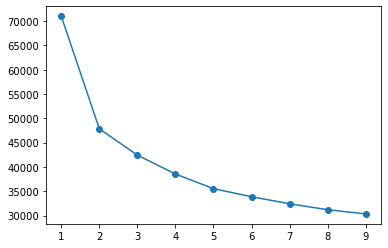

In [61]:
from kmodes.kprototypes import KPrototypes

# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kp = KPrototypes(n_jobs = -1, n_clusters = cluster, random_state = 42)
        kp.fit_predict(prototypeArray, categorical = [0,1,2,3,4,5])
        cost.append(kp.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

        
cluster = range(1,10)
plt.plot(cluster,cost,'-o')
plt.xticks(cluster)
plt.show()

In [62]:
# Converting the results into a dataframe and plotting them
#df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
#df_cost
#sns.scatterplot(data = df_cost, x = 'Cluster', y = 'Cost')

In [63]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters = 4, random_state = 42)
kp.fit(prototypeArray, categorical = [0,1,2,3,4,5])

KPrototypes(gamma=0.5, n_clusters=4, random_state=42)

In [64]:
kpPreds = pd.DataFrame(kp.predict(prototypeArray, categorical = [0,1,2,3,4,5]))
kpPreds.rename(columns = {0:'Clusters'}, inplace = True)
kpDataFrame = pd.concat([prototypeData.loc[:],kpPreds], axis = 1)
kpDataFrame.head(2)

Retailer     Region     State      City                  Product  \
0  Foot Locker  Northeast  New York  New York    Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York  Men's Athletic Footwear   

  Sales Method  Price per Unit  Units Sold  Total Sales  Operating Profit  \
0     In-store        0.325297    4.401913     3.570794          4.900780   
1     In-store        0.325297    3.468385     2.866115          2.132757   

   Operating Margin  Clusters  
0          0.792333         0  
1         -1.265442         0

In [65]:
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Observations: 
- Cluster number 1 is the biggest cluster where the Operating Margin is highest where as the price is the second highest. Total Sales and Profit seems to be in the lower side of things as well
- Cluster 0 which is the smallest of all has a nature of having low 'Operating Margin' and high sales and profit
- Cluster 2 has the lowest Operating Margin with a decent average price
- Cluster 3 has a good Operating Margin considering the ratio to it's respective sales

In [66]:
kpDataFrame['Clusters'].value_counts()

1    3455
3    2994
2    2194
0    1005
Name: Clusters, dtype: int64

In [67]:
clusterProfile = kpDataFrame.groupby('Clusters').agg({
    "Price per Unit": "mean",
    "Units Sold": "mean",
    "Total Sales": "mean",
    "Operating Profit": "mean",
    "Operating Margin": "mean",
    "Retailer": lambda x:x.value_counts().index[0],
    "Region":  lambda x:x.value_counts().index[0],
    "State":  lambda x:x.value_counts().index[0],
    "City": lambda x:x.value_counts().index[0],
    "Sales Method": lambda x:x.value_counts().index[0]
})
clusterProfile

Price per Unit  Units Sold  Total Sales  Operating Profit  \
Clusters                                                              
0               1.030730    2.141079     2.332479          2.332805   
1               0.346161   -0.590062    -0.594885         -0.555080   
2               0.256826    0.587964     0.596395          0.503088   
3              -0.933650   -0.468642    -0.533502         -0.511169   

          Operating Margin     Retailer     Region          State  \
Clusters                                                            
0                -0.395750    West Gear       West     California   
1                 0.728991  Foot Locker  Northeast       New York   
2                -0.804693  Foot Locker  Northeast  Massachusetts   
3                -0.118717    West Gear      South          Texas   

                    City Sales Method  
Clusters                               
0               New York       Outlet  
1               Portland       Online  
2               Portland     In-store  
3         Salt Lake City       Outlet

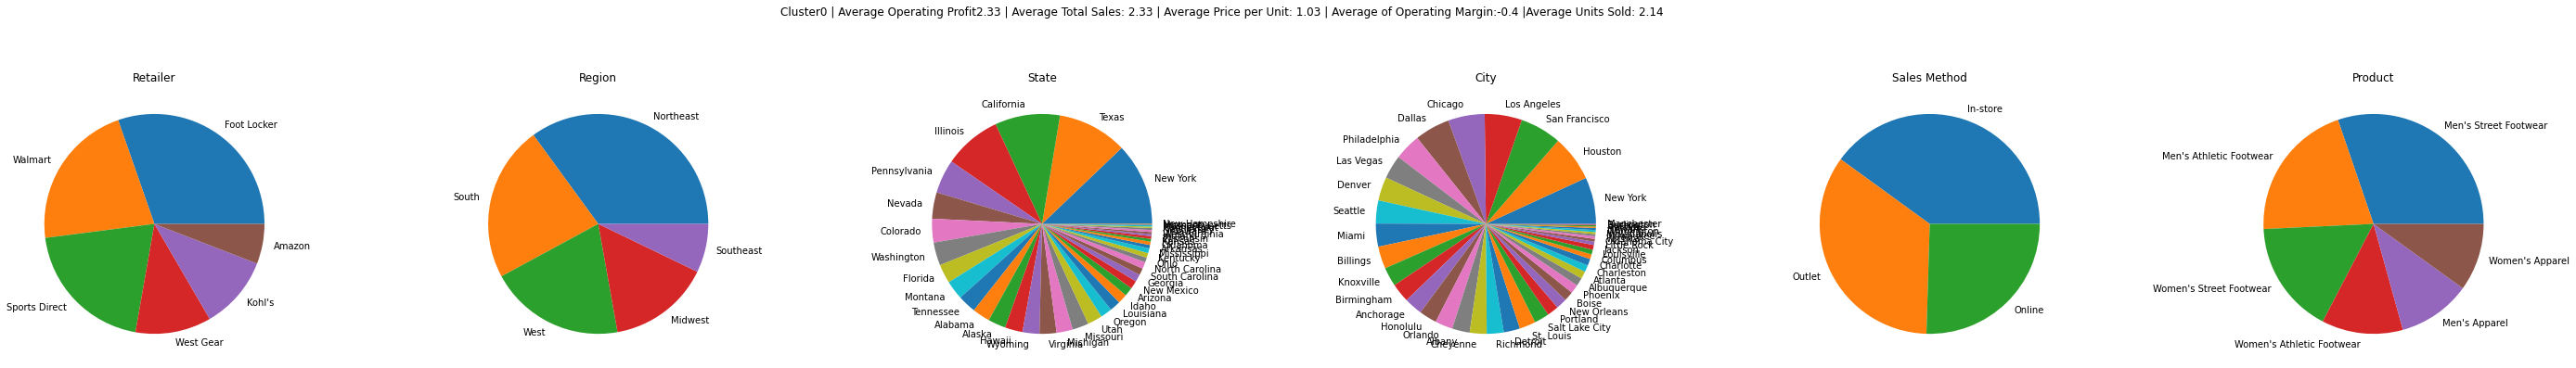

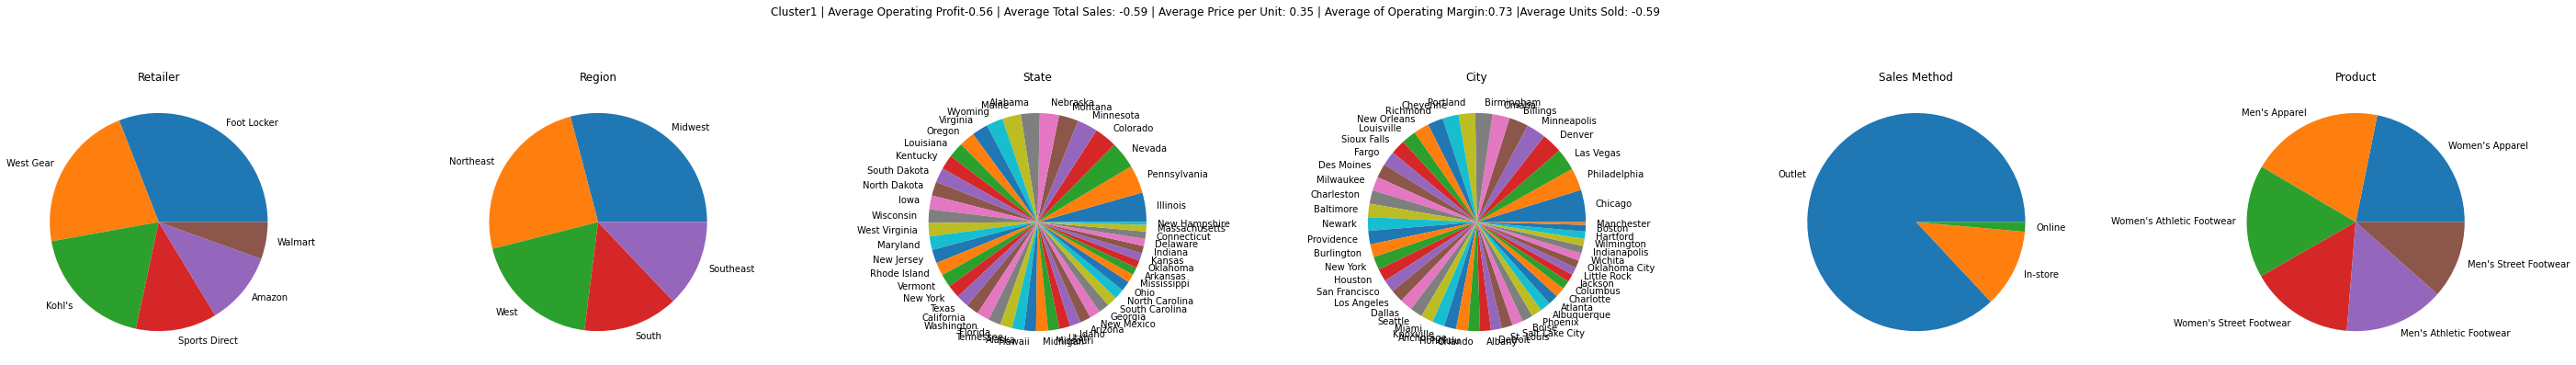

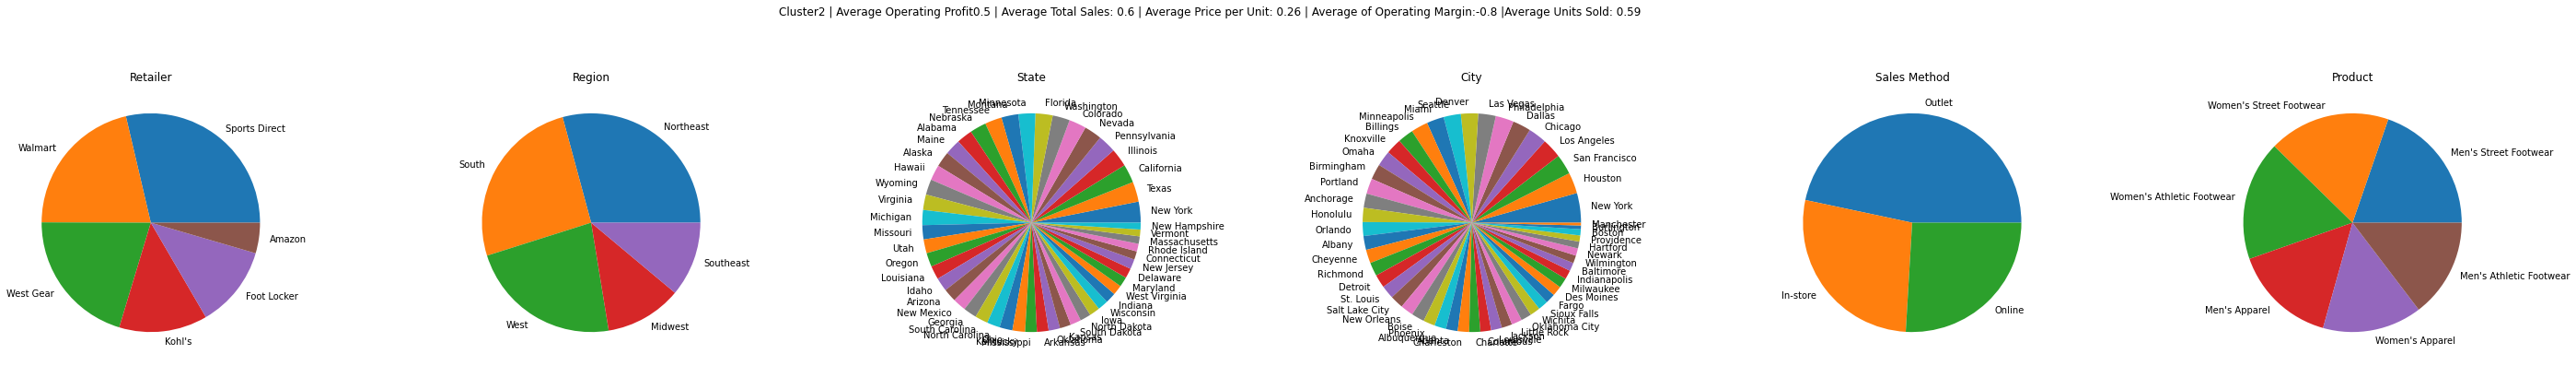

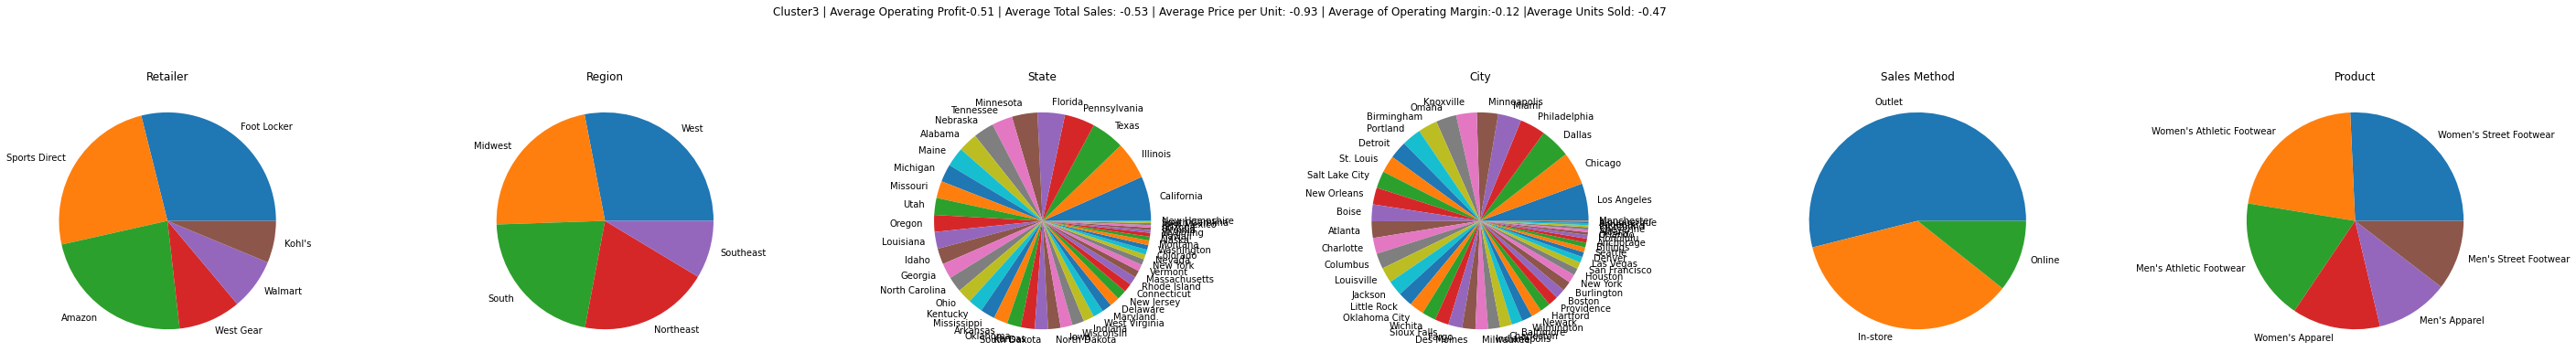

In [68]:
def cluster_pie(df):
    c = len(df.select_dtypes('object').nunique())
    K = df['Clusters'].nunique()
    for k in range(K):
        #Sub dataframe with respect to the cluster in the loop
        dfc = df[df['Clusters'] == k]
        
        #Numeric Features Metrics
        op = dfc['Operating Profit'].mean()
        ts = dfc['Total Sales'].mean()
        ppu = dfc['Price per Unit'].mean()
        om = dfc['Operating Margin'].mean()
        us = dfc['Units Sold'].mean()
        
        #Plot Characteristics
        fig = plt.figure(figsize = (50,12))
        fig.suptitle("Cluster" + str(k) + " | Average Operating Profit" + str(round(op,2)) + " | Average Total Sales: " + str(round(ts,2)) +
                    " | Average Price per Unit: " + str(round(ppu,2)) + " | Average of Operating Margin:" + str(round(om,2)) +
                     " |Average Units Sold: " + str(round(us,2)))
        
        #Subplot Creation
        ax1 = plt.subplot2grid((2,c),(0,0))
        plt.pie(dfc['Retailer'].value_counts(), labels = dfc['Retailer'].unique())
        plt.title("Retailer")

        ax1 = plt.subplot2grid((2,c),(0,1))
        plt.pie(dfc['Region'].value_counts(), labels = dfc['Region'].unique())
        plt.title("Region")

        ax1 = plt.subplot2grid((2,c),(0,2))
        plt.pie(dfc['State'].value_counts(), labels = dfc['State'].unique())
        plt.title("State")

        ax1 = plt.subplot2grid((2,c),(0,3))
        plt.pie(dfc['City'].value_counts(), labels = dfc['City'].unique())
        plt.title("City")
    
        ax1 = plt.subplot2grid((2,c),(0,4))
        plt.pie(dfc['Sales Method'].value_counts(), labels = dfc['Sales Method'].unique())
        plt.title("Sales Method")
        
        ax1 = plt.subplot2grid((2,c),(0,5))
        plt.pie(dfc['Product'].value_counts(), labels = dfc['Product'].unique())
        plt.title("Product")

        

cluster_pie(kpDataFrame)

In [69]:
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\johnr\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




#### Cluster 0 (Possible Luxury shoes like yeezeys): 
- Highest average price and the most units sold 
- Heavily into footwear and least in apparel out of all clusters
- Low 'Operating Margin' with respect to the amount of sales which can imply that the 'Operational costs' are high
- Highly based out of New York, Texas and California
- Street footwear has the highest contributed products

#### Cluster 1:
- Has the highest operating margin and is highly based out of outlets
- Apparel are the highest selling products
- Profit maximization is a great potential with this cluster characteristic as the profit for one unit of sale is high

#### Cluster 2:
- Only cluster where Footlocker is not a major contributor
- Lowest Operational Marginout of all clusters
- The units sold for these products tend to do good and include Street footwear mostly but of a lower price range


#### Cluster 3: 
- Least average price out of all the clusters
- High operating margin with respect to the profit and sales
- Very less based out in the 'North east' region when compared to the other clusters
